# Coursera - Chebyshev derivative

## Import libraries

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Define parameters

In [7]:
x_n_points = 200                                                       # number of grid points in X
x = np.zeros(x_n_points + 1)
for i in range(0, x_n_points + 1):
    x[i] = np.cos(np.pi * i/float(x_n_points))


## Example function - Gaussian

In [8]:
f = np.exp(-1/0.2**2 * x**2)                                          # Defining a Gaussian function
an_df = -2/float(0.2)**2 * x * np.exp(-1/float(0.2)**2 * x**2)        # Analytical derivative of a Gaussian function

cheby_x = np.zeros(x_n_points + 1)
cheby_x[0] = 2
cheby_x[x_n_points] = 2
cheby_x[1:x_n_points] = 1

cheby_matrix_D = np.zeros((x_n_points + 1, x_n_points + 1))            # Differentiation matrix
for i in range(0, x_n_points + 1):
    for j in range(0, x_n_points + 1):
        if i == j and i != 0 and i != x_n_points:
            cheby_matrix_D[i, i] = -x[i] / float((2 * (1 - x[i] * x[i])))
        else:
            cheby_matrix_D[i, j] = (cheby_x[i] * (-1) ** (i + j)) / (float(cheby_x[j]) * (x[i] - x[j]))

cheby_matrix_D[0, 0] = (2. * x_n_points ** 2 + 1) / float(6)
cheby_matrix_D[x_n_points, x_n_points] = -1 * cheby_matrix_D[0, 0]

num_df = np.dot(cheby_matrix_D, f)                                      # Use numpy.dot() for matrix vector product

error = np.sum((num_df - an_df)**2) / np.sum(an_df**2) * 100            # Calculate error between the solutions
print ("Error is: ", error)

Error is:  1.9162368125088013e-24


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


## Plot the functions

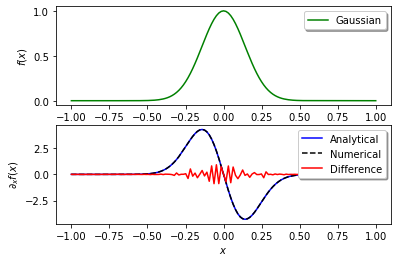

In [9]:
plt.subplot(2,1,1)
plt.plot(x, f, "g", lw = 1.5, label='Gaussian')
plt.legend(loc='upper right', shadow=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.subplot(2,1,2)
plt.plot(x, an_df, "b", lw = 1.5, label='Analytical')
plt.plot(x, num_df, 'k--', lw = 1.5, label='Numerical')
plt.plot(x, (num_df - an_df)*(1e12), "r", lw = 1.5, label='Difference')     # error is magnified by a factor of e**12
plt.legend(loc='upper right', shadow=True)
plt.xlabel('$x$')
plt.ylabel('$\partial_x f(x)$')

plt.show()